In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import os

In [2]:
analysis_K_30_day1= pd.read_csv('../data/analysis_K_30_day1.csv')
analysis_K_30_day2= pd.read_csv('../data/analysis_K_30_day2.csv')
analysis_K_30_day3= pd.read_csv('../data/analysis_K_30_day3.csv')
analysis_K_30_day4= pd.read_csv('../data/analysis_K_30_day4.csv')
analysis_K_30_day5= pd.read_csv('../data/analysis_K_30_day5.csv')
analysis_K_30_day1

,K,distance_vans,nb_rebalancings,unmet_demand
0,1,39.539498,20.0,404.0
1,2,55.316144,33.0,352.0
2,3,57.803399,39.0,340.0
3,4,51.311275,45.0,334.0
4,5,55.412496,51.0,334.0
5,6,51.108369,48.0,325.0
6,7,53.501373,55.0,318.0
7,8,48.886492,60.0,317.0
8,9,53.638721,56.0,292.0
9,10,50.466131,53.0,298.0


In [3]:
# Build average results over the 5 days
analysis_K_30_avg=analysis_K_30_day1.copy()
analysis_K_30_avg["distance_vans"]=(analysis_K_30_day1["distance_vans"]+analysis_K_30_day2["distance_vans"]+analysis_K_30_day3["distance_vans"]+analysis_K_30_day4["distance_vans"]+analysis_K_30_day5["distance_vans"])/5
analysis_K_30_avg["nb_rebalancings"]=(analysis_K_30_day1["nb_rebalancings"]+analysis_K_30_day2["nb_rebalancings"]+analysis_K_30_day3["nb_rebalancings"]+analysis_K_30_day4["nb_rebalancings"]+analysis_K_30_day5["nb_rebalancings"])/5
analysis_K_30_avg["unmet_demand"]=(analysis_K_30_day1["unmet_demand"]+analysis_K_30_day2["unmet_demand"]+analysis_K_30_day3["unmet_demand"]+analysis_K_30_day4["unmet_demand"]+analysis_K_30_day5["unmet_demand"])/5

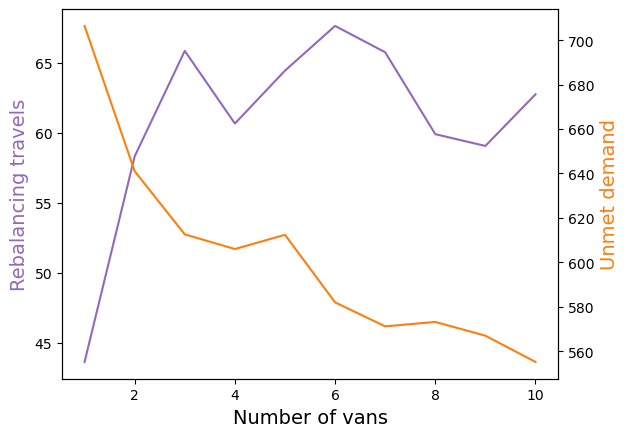

In [4]:
# plot unmet_demand and distance_vans for each K
import matplotlib.pyplot as plt
K=analysis_K_30_avg['K']

# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(K,analysis_K_30_avg['distance_vans'],color="tab:purple")
# set x-axis label
ax.set_xlabel("Number of vans", fontsize = 14)
# set y-axis label
ax.set_ylabel("Rebalancing travels",
              color="tab:purple",
              fontsize=14)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(K,analysis_K_30_avg['unmet_demand'],color="tab:orange")
ax2.set_ylabel("Unmet demand",color="tab:orange",fontsize=14)
plt.show()
# save the plot as a file
#fig.savefig('Costs_vs_K.png',
#            format='png',
#            dpi=100,
#            bbox_inches='tight')

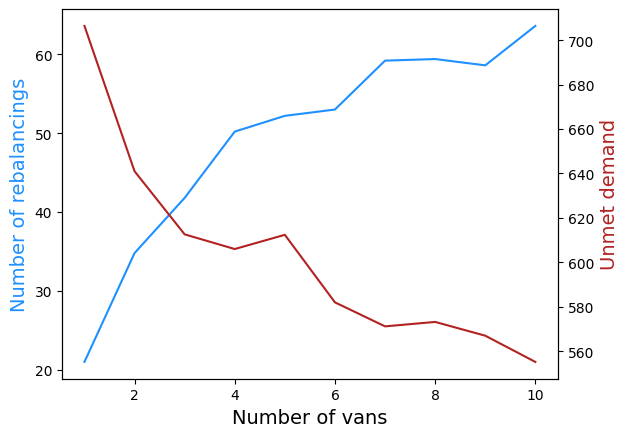

In [16]:
# plot unmet_demand and distance_vans for each K
import matplotlib.pyplot as plt
K=analysis_K_30_avg['K']

# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(K,analysis_K_30_avg['nb_rebalancings'],color="dodgerblue")
# set x-axis label
ax.set_xlabel("Number of vans", fontsize = 14)
# set y-axis label
ax.set_ylabel("Number of rebalancings",
              color="dodgerblue",
              fontsize=14)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(K,analysis_K_30_avg['unmet_demand'],color="firebrick")
ax2.set_ylabel("Unmet demand",color="firebrick",fontsize=14)
plt.show()
# save the plot as a file
fig.savefig('Costs_vs_K.png',
            format='png',
            dpi=100,
            bbox_inches='tight')

In [13]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(
    go.Scatter(x=analysis_K_30_avg['K'], y=analysis_K_30_avg['nb_rebalancings'], name="Number of rebalancing trips", line=dict(color='dodgerblue')),
    secondary_y=False,
)
fig.add_trace(
    go.Scatter(x=analysis_K_30_avg['K'], y=analysis_K_30_avg['unmet_demand'], name="Unmet demand", line=dict(color='firebrick')),
    secondary_y=True,
)
fig.update_layout(
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    showlegend=False,
    width=800,
    height=500,
    margin=dict(l=60, r=60, b=30, t=60),
    yaxis = dict(tickfont = dict(size=14)),
    xaxis = dict(tickfont = dict(size=14))
)
fig.update_xaxes(title_text="Number of vans",showgrid=False, showline=True, linewidth=1, linecolor='black', title_font=dict(color="black",size=18))
fig.update_yaxes(title_text="Number of rebalancing trips", secondary_y=False, showgrid=False, showline=True, linewidth=1, linecolor='black', title_font=dict(color="dodgerblue",size=18))
fig.update_yaxes(title_text="Unmet demand", secondary_y=True, showgrid=False, showline=True, linewidth=1, linecolor='black', title_font=dict(color="firebrick",size=18), tickfont = dict(size=14))
fig.show()
fig.write_image("demand_vs_vans_report.pdf")

## Unmet demand reduction analysis

In [38]:
# folder should be named 'nb_stations'_'nb_vans'_'S'_*
def load_results(data_folder):
    results_folder = os.path.join("../../results/data", data_folder)
    nb_stations = int(data_folder.split('_')[2])
    nb_vans = int(data_folder.split('_')[4])

    with open(os.path.join(results_folder, 'x.csv'), 'r') as f:
        x = f.read().splitlines()
    x = np.array(x).astype(float).reshape((nb_stations,nb_stations,nb_vans,24),order='F')

    with open(os.path.join(results_folder, 'v.csv'), 'r') as f:
        v = f.read().splitlines()
    v = np.array(v).astype(float).reshape((nb_stations,nb_stations,nb_vans,24),order='F')

    with open(os.path.join(results_folder, 'z.csv'), 'r') as f:
        z = f.read().splitlines()
    z = np.array(z).astype(float).reshape((nb_stations,nb_stations,nb_vans,24),order='F')

    with open(os.path.join(results_folder, 'y.csv'), 'r') as f:
        y = f.read().splitlines()
    y = np.array(y).astype(float).reshape((nb_stations,24),order='F')

    with open(os.path.join(results_folder, 'w.csv'), 'r') as f:
        w = f.read().splitlines()
    w = np.array(w).astype(float).reshape((nb_stations,nb_stations,24),order='F')

    with open(os.path.join(results_folder, 'u.csv'), 'r') as f:
        u = f.read().splitlines()
    u = np.array(u).astype(float).reshape((nb_stations,nb_stations,24),order='F')

    with open(os.path.join(results_folder, 'd.csv'), 'r') as f:
        d = f.read().splitlines()
    d = np.array(d).astype(float).reshape((nb_stations,nb_stations,24),order='F')

    return x, v, z, y, w, u, d

In [39]:
_, _, _, _, _, u_w, d1 = load_results('2022-12-08T143901_nstations_31_nvans_5_capacity_20_lambda_4_timelimit_160_norebal')

In [40]:
# demand day 1
# sum all the elements of d1
np.sum(d1)

12031.0

In [41]:
# Unmet demand with rebalancing
analysis_K_30_day1["unmet_demand"][4] # for 5 vans

334.0

In [42]:
# Unmet demand with rebalancing
analysis_K_30_day1["unmet_demand"][9] # for 10 vans

298.0

In [34]:
# Unmet demand on day 1 without rebalancing
np.sum(u_w)

623.0